In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import os

In [4]:
#Reading the data in python
ratings=pd.read_csv('rating.csv')

In [5]:
movie=pd.read_csv("movie.csv")

In [6]:
link=pd.read_csv('link.csv')

In [7]:
tag=pd.read_csv('tag.csv')

In [8]:
ratings.head(3)

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39


In [9]:
movie.head(3)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


In [10]:
tag.head(3)

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19


In [11]:
link.head(3)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0


In [12]:
x=ratings[['userId','movieId','rating']]

In [14]:
y=x.groupby('userId')['rating'].count().reset_index().sort_values(by='rating', ascending=False)

In [15]:
z=x.groupby('movieId')['rating'].count().reset_index().sort_values(by='rating',ascending=False)

In [76]:
ratings['userId'].max()

138493

99.0

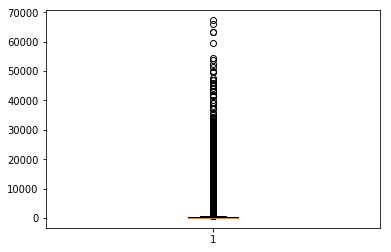

In [16]:
#z['rating']
B=plt.boxplot(z['rating'])
[item.get_ydata()[0] for item in B['whiskers']]
z['rating'].quantile(0.68)

[35.0, 155.0]

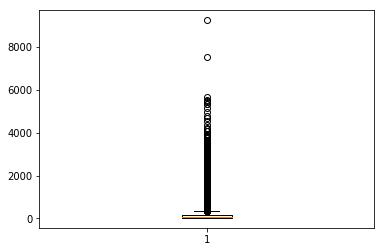

In [17]:
B=plt.boxplot(y['rating'])
[item.get_ydata()[0] for item in B['whiskers']]

In [67]:
#Experiment for str
percentage=0.87
value=y['rating'].quantile(percentage)
print("The value of number of rating given by user in this quantile value(in terms of percentage)",percentage*100,"% is :- ",value)
print("\nThe number of reviews given by the user :- ",value)
print("\nThe total number of users :-",138493)
print("\nThe number of users getting removed is :- ",(138493-y[y['rating']>=value].shape[0]))
print("\nThe number of users will be is :- ",y[y['rating']>=value].shape[0])
print("\nThe original size of data",ratings.shape[0])
print("\nThe size of the data after subsetting :- ",ratings[ratings['userId'].isin(list(y[y['rating']>=value].userId))].shape[0])
print("\nThe percentage of size of data we are getting is :- ",(ratings[ratings['userId'].isin(list(y[y['rating']>=value].userId))].shape[0]/ratings.shape[0])*100)

The value of number of rating given by user in this quantile value(in terms of percentage) 87.0 % is :-  276.0

The number of reviews given by the user :-  276.0

The total number of users :- 138493

The number of users getting removed is :-  120440

The number of users will be is :-  18053

The original size of data 20000263

The size of the data after subsetting :-  10429481

The percentage of size of data we are getting is :-  52.1467192706416


In [68]:
data=ratings[ratings['userId'].isin(list(y[y['rating']>=value].userId))]

In [70]:
print("\nThe size of the data set after removing the movies who 's number of rating is less than 100 :- ",data[data['movieId'].isin(list(z[z['rating']>=100].movieId))].shape[0])
data=data[data['movieId'].isin(list(z[z['rating']>=300].movieId))]


The size of the data set after removing the movies who 's number of rating is less than 100 :-  9984518


In [20]:
from IPython.display import Image
Image(url='https://wiki.ubc.ca/images/a/a5/CollaborativeFiltering.jpg')

In [71]:
matrix=data[['userId','movieId','rating']].groupby(['userId','movieId']).first().unstack().replace(np.nan, '', regex=True)

In [106]:
pd.set_option('display.max_columns', 500)
matrix

rating                                                                 \
movieId 1      2      3      4      5      6      7      8      9      10       
userId                                                                          
7                          3                           3                        
11         4.5                                                            2.5   
24           4                           2      4      3                    3   
54           4      3                    3      3                           4   
58           5                                4.5                               
91           4    3.5      3                         2.5                    4   
96         3.5             4                                                    
104                                                                             
116          3      2      2                  1.5             1    1.5      2   
124          5      2                           5                           4   
129          4      3                                                           
131          2      1                                                           
132                 3                                                           
133          4                                3.5                               
134          4                                  3                               
137          4      3                           5                           3   
147        4.5                                  4                               
156          5      5      2      3      3      4      4             3      4   
208          4                                                                  
215          2                                                                  
220          4      3                           3                               
239          5                                                            3.5   
245                                                                             
247                                             5      4                    3   
251          4      4      5             4             5                        
258          4                                                                  
271        1.5    2.5    3.5                                              3.5   
278               3.5                           4                         2.5   
283                                             4                           3   
294        4.5    4.5                  2.5    3.5    2.5                  3.5   
...        ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
138267       4                                                                  
138270                            1             2      3                    2   
138285                                          5                               
138289     1.5                                  5                           5   
138295     3.5      2                           5                           3   
138301     2.5    2.5                         3.5                           2   
138307     3.5    2.5                           2                               
138317       3      3                           3                    2      2   
138325       5      3                         4.5                         3.5   
138335            0.5                                                     2.5   
138343            2.5                           3                               
138382       3      4      3      4                    3                        
138386     3.5                                                                  
138387     2.5    3.5    3.5           2.5             3                  2.5   
138397                     5                    5                           4   
138404       5    2.5                  

In [10]:
from collections import Counter
Counter(ratings.userId)

Counter({1: 175,
         2: 61,
         3: 187,
         4: 28,
         5: 66,
         6: 24,
         7: 276,
         8: 70,
         9: 35,
         10: 38,
         11: 504,
         12: 36,
         13: 62,
         14: 243,
         15: 49,
         16: 60,
         17: 26,
         18: 121,
         19: 50,
         20: 28,
         21: 163,
         22: 133,
         23: 102,
         24: 506,
         25: 121,
         26: 61,
         27: 69,
         28: 32,
         29: 177,
         30: 31,
         31: 246,
         32: 73,
         33: 50,
         34: 93,
         35: 195,
         36: 20,
         37: 20,
         38: 74,
         39: 20,
         40: 73,
         41: 59,
         42: 51,
         43: 87,
         44: 33,
         45: 44,
         46: 122,
         47: 50,
         48: 99,
         49: 30,
         50: 99,
         51: 102,
         52: 20,
         53: 206,
         54: 710,
         55: 30,
         56: 179,
         57: 24,
         58: 657,
   

In [13]:
from collections import Counter 
  
# Creation of a Counter Class object using  
# string as an iterable data container 
x = Counter("geeksforgeeks") 
print(x)
# printing the elements of counter object 

for i in x.elements(): 
    print ( i, end = " ")


Counter({'e': 4, 'g': 2, 'k': 2, 's': 2, 'f': 1, 'o': 1, 'r': 1})
g g e e e e k k s s f o r 